In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
with open('./input/input_5.txt') as file:
    listo = [line.rstrip('\n') for line in file]

In [309]:
def parse(line):
    p1, p2 = line.split(' -> ')
    
    point_1 = p1.split(',')
    point_2 = p2.split(',')
    
    point_1 = tuple(int(p) for p in point_1)
    point_2 = tuple(int(p) for p in point_2)
    
    return [point_1, point_2]

In [310]:
# test parse 
parse('955,125 -> 151,929')

[(955, 125), (151, 929)]

In [311]:
point_coords = [parse(line) for line in listo]

In [370]:
point_coords_ex = [
[(0,9),(5,9)],
[(8,0),(0,8)],
[(9,4),(3,4)],
[(2,2),(2,1)],
[(7,0),(7,4)],
[(6,4),(2,0)],
[(0,9),(2,9)],
[(3,4),(1,4)],
[(0,0),(8,8)],
[(5,5),(8,2)],
]

In [312]:
# get max grid
max_x = max([max(p1[0], p2[0])  for p1, p2 in point_coords])
max_y = max([max(p1[1], p2[1])  for p1, p2 in point_coords])

max_x, max_y

(989, 990)

In [319]:
point_coords[5:15]

[[(471, 180), (471, 746)],
 [(725, 478), (791, 544)],
 [(577, 413), (577, 753)],
 [(636, 937), (181, 937)],
 [(46, 601), (714, 601)],
 [(400, 905), (400, 972)],
 [(911, 773), (883, 801)],
 [(818, 684), (818, 705)],
 [(71, 846), (151, 846)],
 [(737, 489), (626, 378)]]

In [237]:
matrix_list = []

for k, line in enumerate(point_coords):
        
    if check_diagonal(line) == True:
        continue
    
    line_map = generate_sline_map(line)
    
    matrix_list.append(line_map)

In [244]:
final_map = sum(matrix_list)

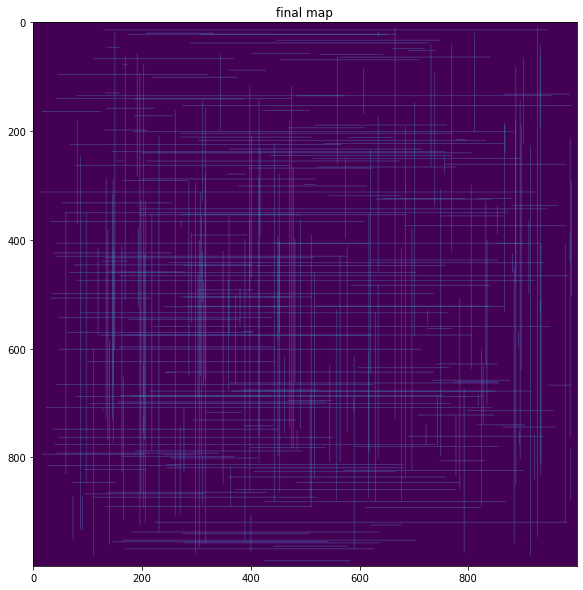

In [247]:
plt.figure(figsize=(10,10))
plt.title('final map')
plt.imshow(final_map)

In [253]:
np.where(final_map >= 2)[0].shape

(6225,)

## part 2

In [388]:
matrix_list = []

for k, line in enumerate(point_coords):
        
    if check_diagonal(line) == True:
        line_map = generate_dline_map(line)
        matrix_list.append(line_map)
        
        continue
    
    line_map = generate_sline_map(line)
    
    matrix_list.append(line_map)

In [389]:
len(matrix_list)

500

In [390]:
final_map_2 = sum(matrix_list)

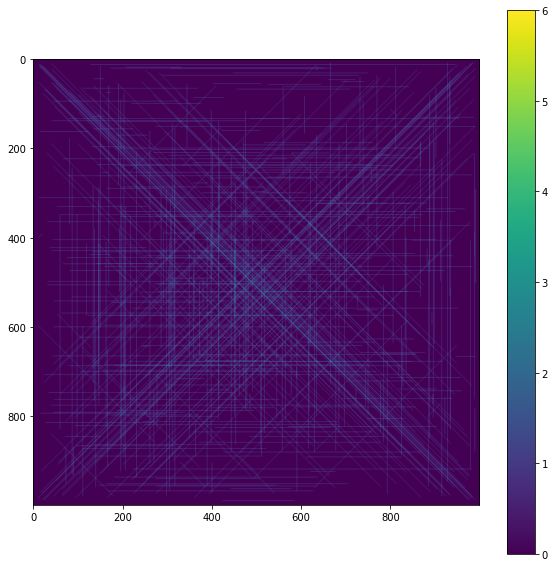

In [391]:
plt.figure(figsize=(10,10))
plt.imshow(final_map_2)
plt.colorbar()

In [ ]:
# 21283 - too low

In [392]:
np.where(final_map_2 > 1)[0].shape

(22116,)

## Functions & tests

In [376]:
def generate_dline_map(line):
    p1 = line[0]
    p2 = line[1]
    
    # to np coords
    p1 = (p1[1], p1[0])
    p2 = (p2[1], p2[0])
    
    y_vals = (p1[0], p2[0])
    if y_vals[0] < y_vals[1]:
        y_range = list(range(y_vals[0], y_vals[1] + 1))
    else:
        y_range = list(range(y_vals[0], y_vals[1] - 1, -1))
    
    x_vals = (p1[1], p2[1])
    if x_vals[0] < x_vals[1]:
        x_range = list(range(x_vals[0], x_vals[1] + 1))
    else:
        x_range = list(range(x_vals[0], x_vals[1] - 1, -1))
    
    amount_points = abs(p1[0] - p2[0]) + 1
    
    line_map = np.zeros((1000, 1000), dtype='uint8')
    
    
    # draw map
    for y, x in zip(y_range, x_range):
        line_map[y, x] = 1
    
    drawn = np.unique(line_map, return_counts=True)[1][1]
    assert amount_points == drawn, f"{amount_points} - {drawn}"
        
    return line_map

In [349]:
dmap_1 = generate_dline_map([(830, 251), (526, 555)])
dmap_2 = generate_dline_map([(182, 185), (13, 16)])
dmap_3 = generate_dline_map([(737, 489), (626, 378)])

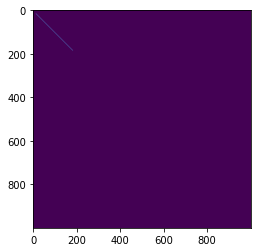

In [350]:
plt.imshow(dmap_2)

In [367]:
assert(dmap_1[250, 829] == 0)
assert(dmap_1[251, 830] == 1)
assert(dmap_1[526, 555] == 1)
assert(dmap_1[527, 556] == 0)

assert(dmap_2[16, 13] == 1)
assert(dmap_2[185, 182] == 1)
assert(dmap_2[186, 183] == 0)

# [(737, 489), (626, 378)]
assert(dmap_3[490, 738] == 0)
assert(dmap_3[489, 737] == 1)
assert(dmap_3[378, 626] == 1)
assert(dmap_3[377, 625] == 0)

(array([0, 1], dtype=uint8), array([999830,    170]))


In [368]:
(np.unique(dmap_2, return_counts=True))[1][1]

170

In [366]:
def generate_sline_map(line):
    p1 = line[0]
    p2 = line[1]
    
    # to np coords
    p1 = (p1[1], p1[0])
    p2 = (p2[1], p2[0])
    
    y_vals = (p1[0], p2[0])
    y_range = list(range(min(y_vals), max(y_vals) + 1))
    
    x_vals = (p1[1], p2[1])
    x_range = list(range(min(x_vals), max(x_vals) + 1))
    
    line_map = np.zeros((1000, 1000), dtype='uint8')
    
    if len(x_range) == 1:
        # draw y/col/vert line
        x = x_range[0]
        
        min_y = min(y_vals)
        max_y = max(y_vals) + 1

        line_map[min_y:max_y, x] = 1
    elif len(y_range) == 1:
        # draw x/row/hor line
        y = y_range[0]
        
        min_x = min(x_vals)
        max_x = max(x_vals) + 1
        
        line_map[y, min_x:max_x] = 1
    
    return line_map
        

In [220]:
# test
map_1 = generate_sline_map([(73, 871), (73, 951)]) # vertical line
map_2 = generate_sline_map([(169, 968), (626, 968)]) # horizontal line

In [228]:
assert(map_2[968, 169] == 1)
assert(map_2[968, 626] == 1)
assert(map_2[968, 627] == 0)

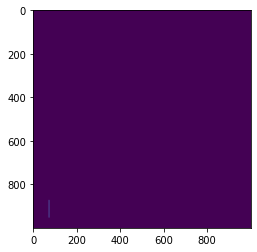

In [222]:
plt.imshow(map_1)

In [381]:
def check_diagonal(line):
    p1 = line[0]
    p2 = line[1]
    
    if (p1[0] != p2[0]) and (p1[1] != p2[1]):
        return True
    
    return False

In [382]:
line_1 = [(955, 125), (151, 929)]
line_2 = [(830, 251), (526, 555)]
line_3 = [(577, 413), (577, 753)]
line_4 = [(169, 968), (626, 968)]
line_5 = [(0, 0), (8, 8)]

print(check_diagonal(line_1)) # diagonal 
print(check_diagonal(line_2)) # diagonal 
print(check_diagonal(line_3)) # straight 
print(check_diagonal(line_4)) # straight
print(check_diagonal(line_5)) # straight 

True
True
False
False
True


In [240]:
a = np.ones((3, 3), dtype='uint8')
b = np.ones((3, 3), dtype='uint8')

In [242]:
np.add(a, b)

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]], dtype=uint8)

In [243]:
sum([a, b])

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]], dtype=uint8)